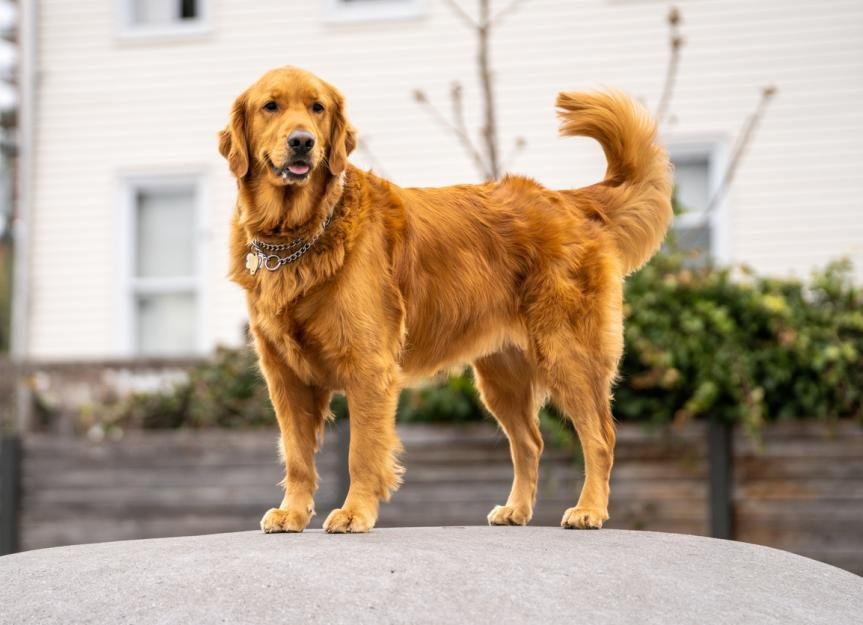

Image Dimensions: 863x625, Channels: 3
Total Pixels: 539375


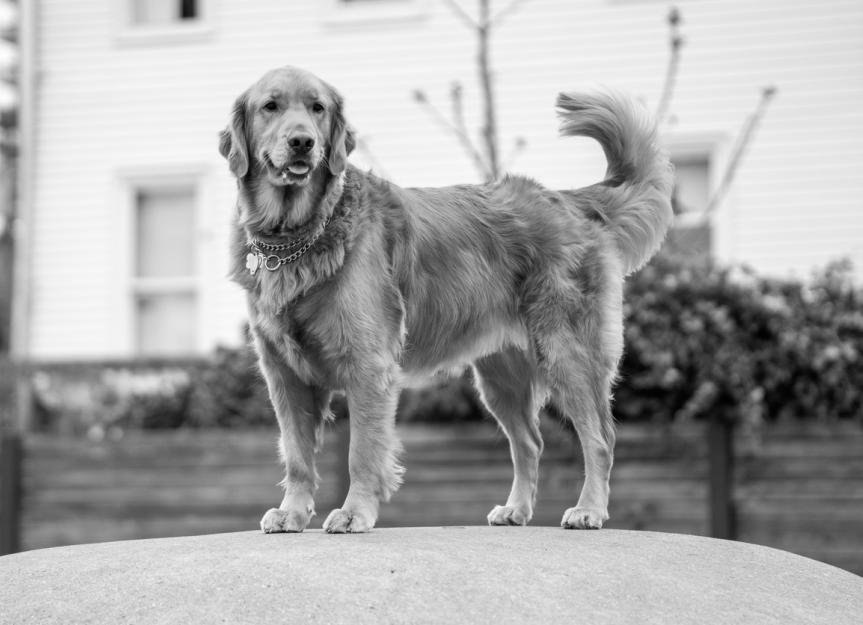

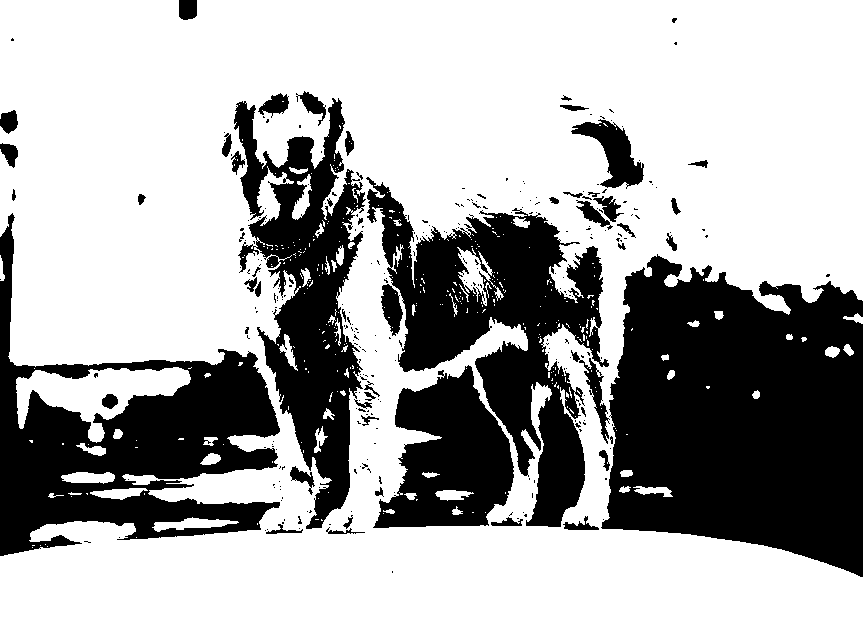

Black Pixel Count: 180688


In [ ]:
import cv2
import numpy as np
from skimage import filters
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow  # Import for Colab

def task1_image_manipulation(image_path):
    # 1. Read the image
    image_bgr = cv2.imread(image_path)

    # 2. Display the image (Using cv2_imshow for Colab)
    cv2_imshow(image_bgr)

    # Convert BGR to RGB
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    cv2.imwrite('image_rgb.jpg', image_rgb)

    # 3. Extract Image Size
    height, width, channels = image_rgb.shape
    print(f'Image Dimensions: {width}x{height}, Channels: {channels}')

    # 4. Calculate Image Pixels
    total_pixels = height * width
    print(f'Total Pixels: {total_pixels}')

    # 5. Convert RGB to Grayscale
    gray_image = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    cv2.imwrite('image_gray.jpg', gray_image)
    cv2_imshow(gray_image)  # Display grayscale image

    # 6. Convert to Binary Image using Thresholding
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    cv2.imwrite('image_binary.jpg', binary_image)
    cv2_imshow(binary_image)  # Display binary image

    # Count black pixels
    black_pixel_count = np.sum(binary_image == 0)
    print(f'Black Pixel Count: {black_pixel_count}')

if __name__ == "__main__":
    image_path = '/content/dog image.jpeg'
    task1_image_manipulation(image_path)

PART-2

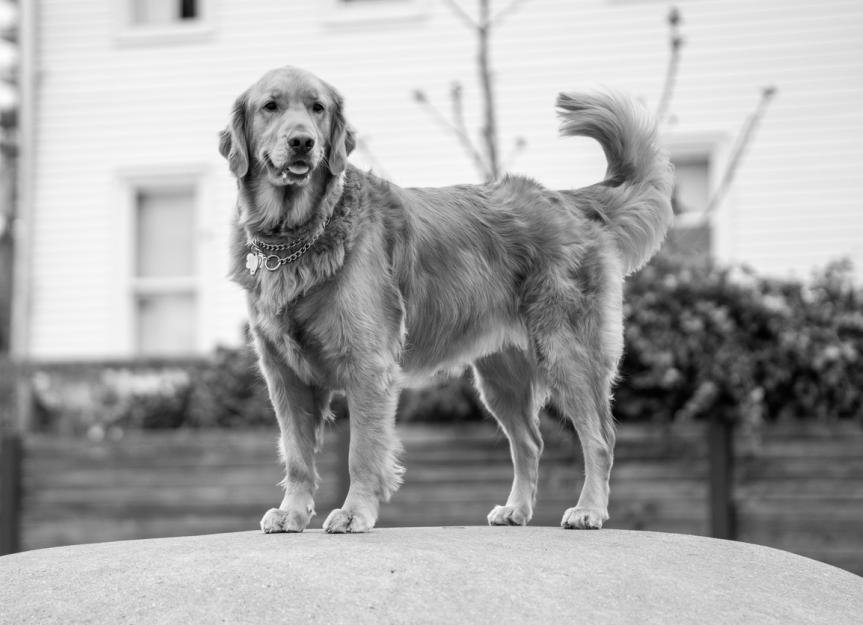

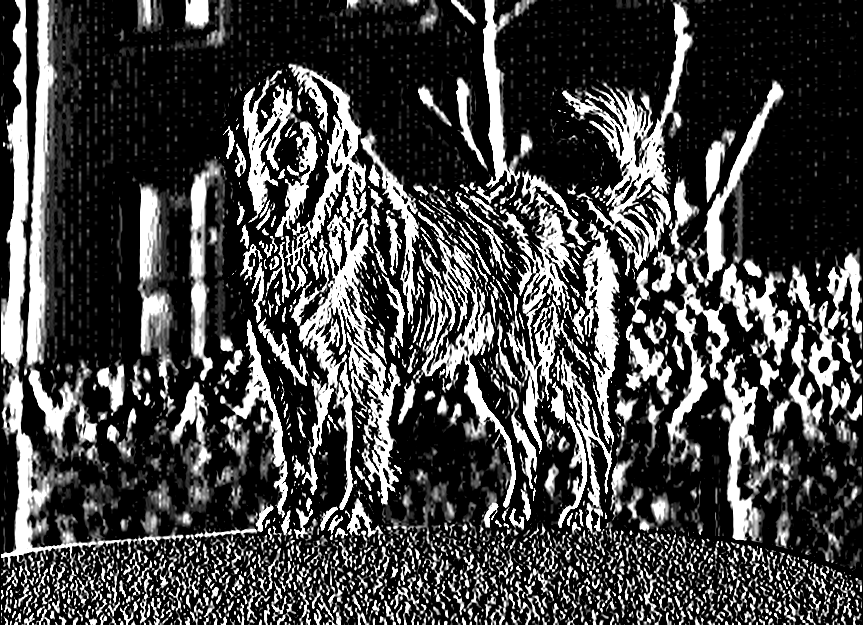

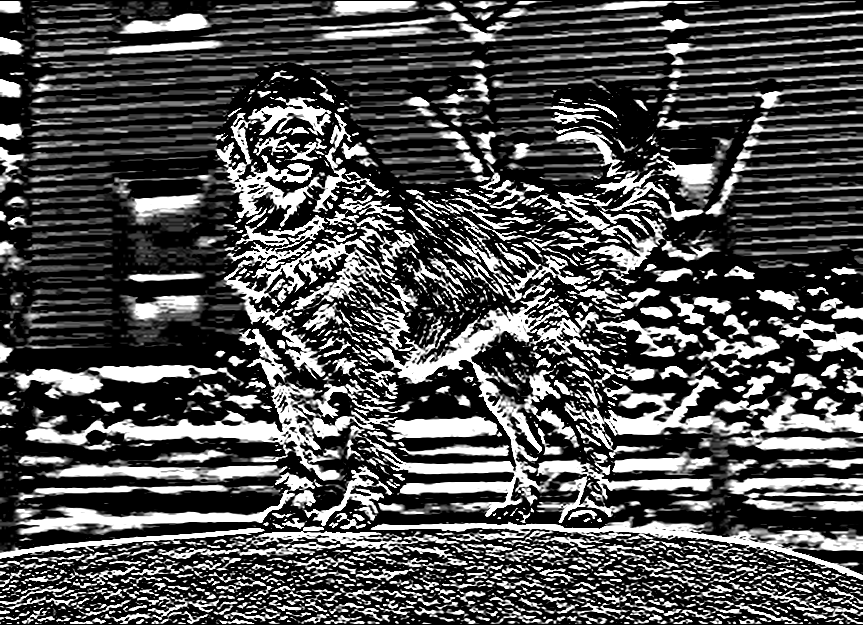

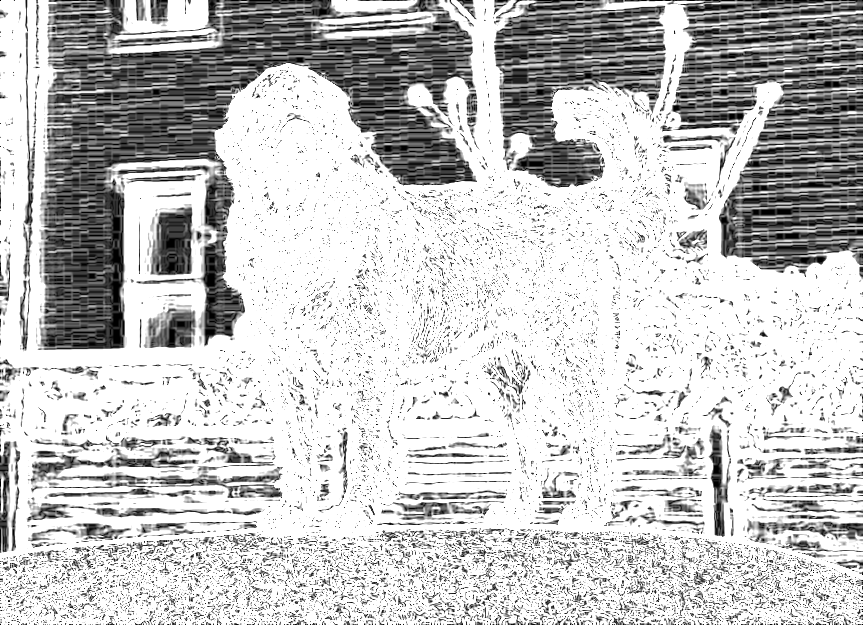

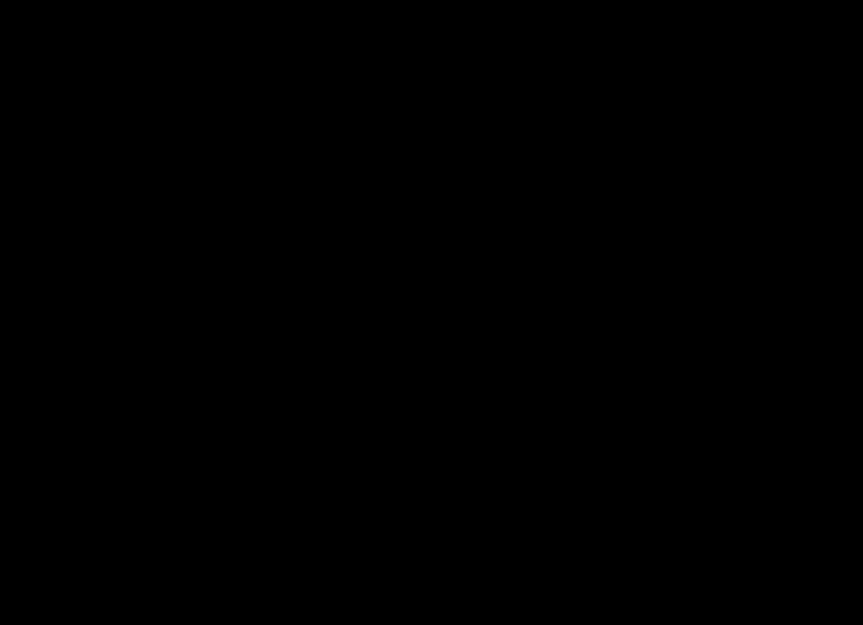

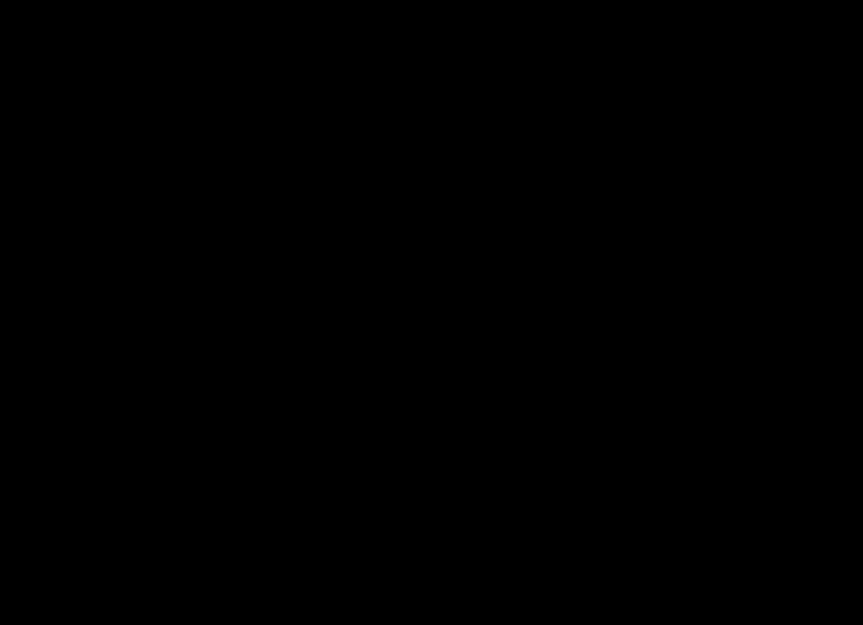

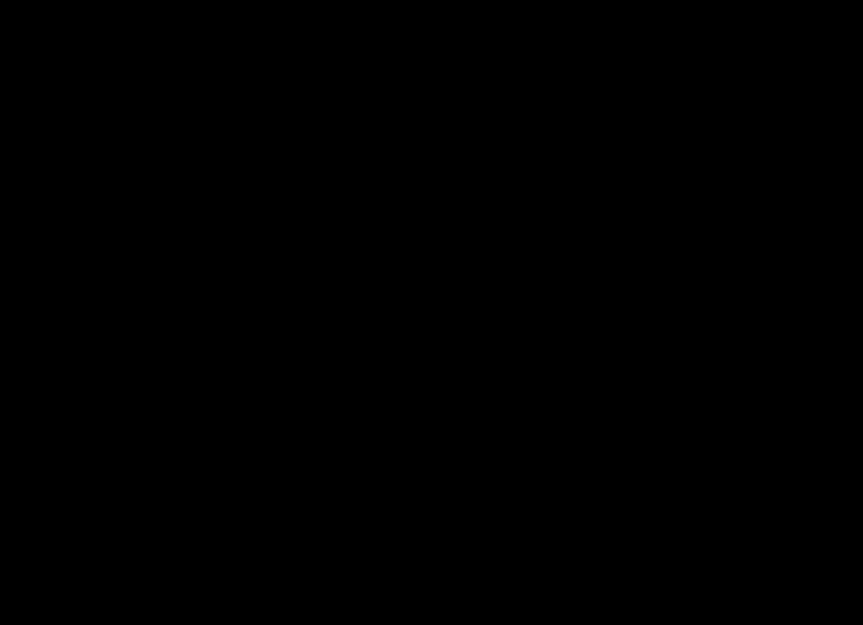

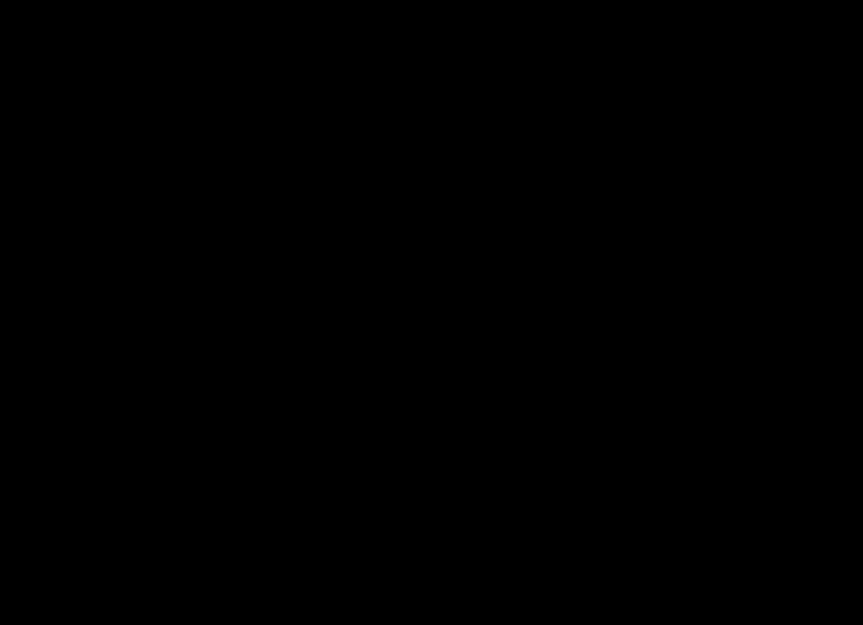

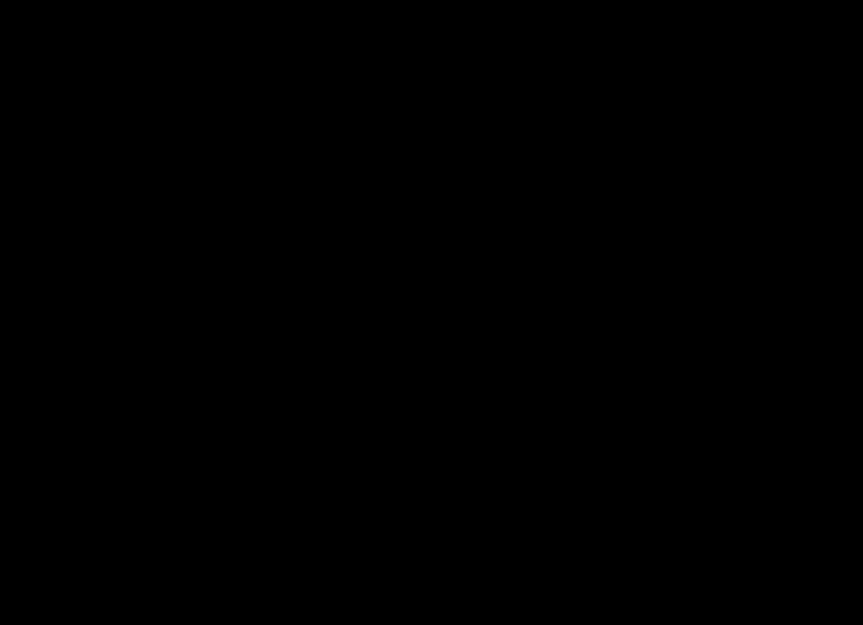

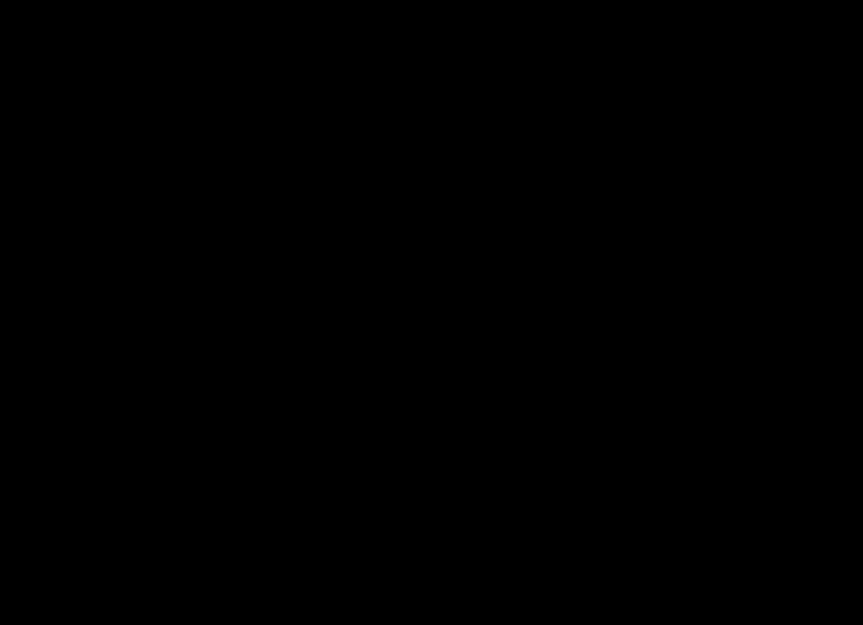

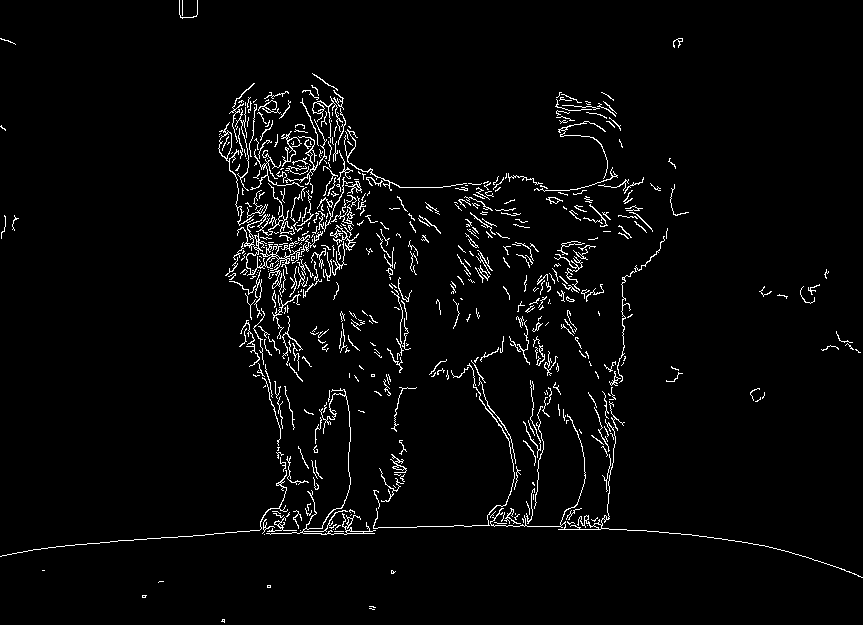

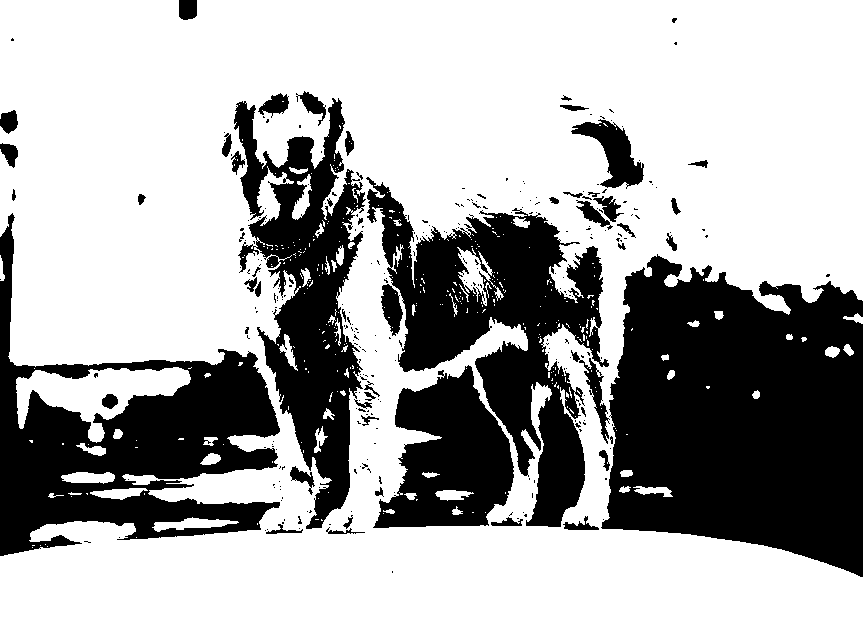

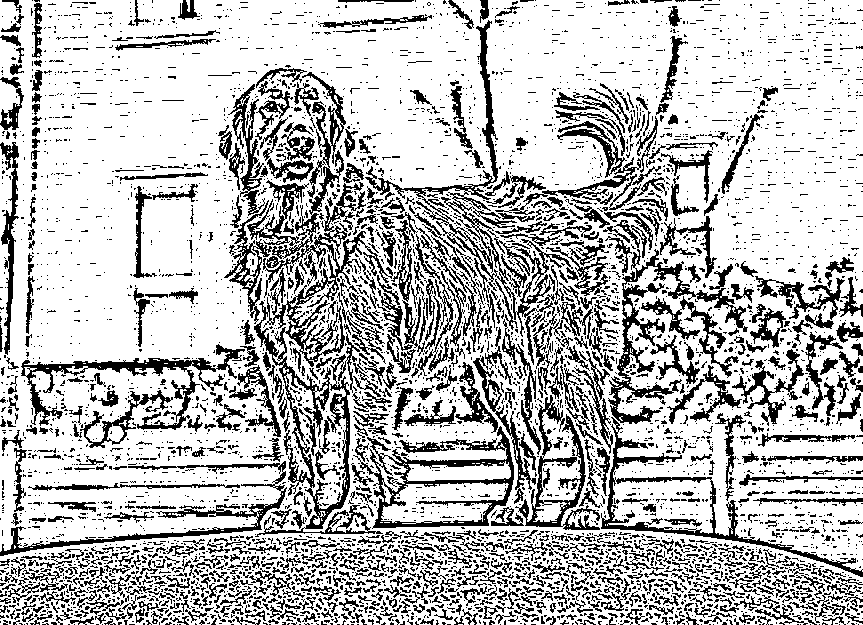

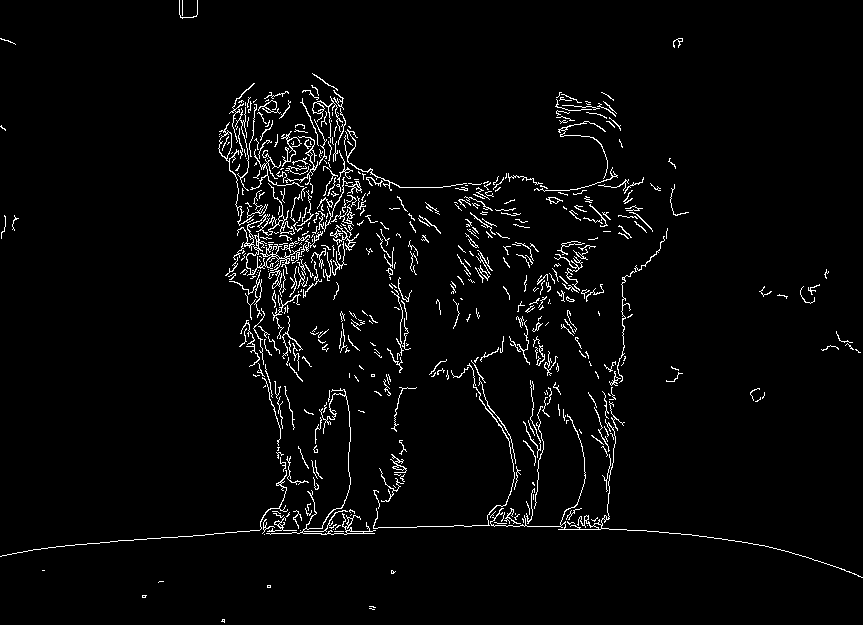

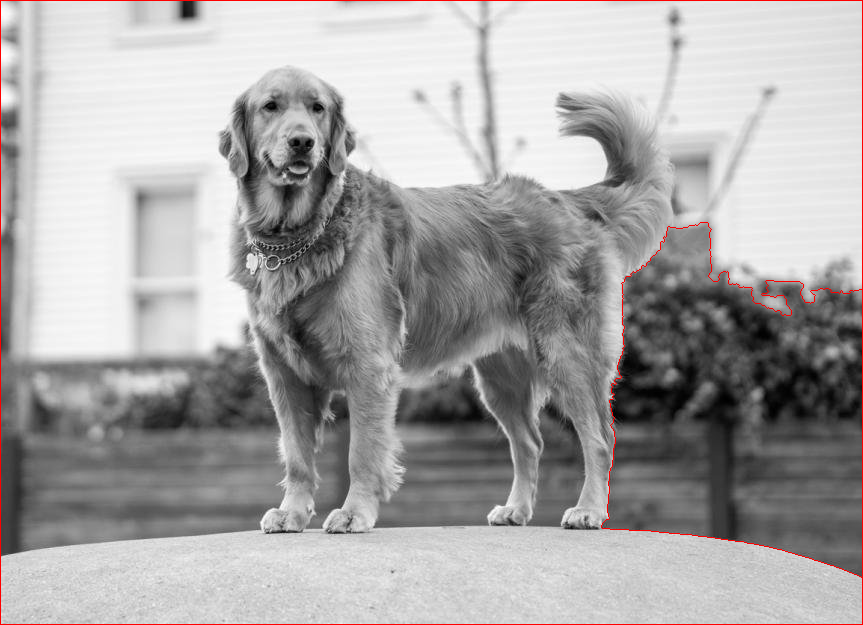

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import filters
import matplotlib.pyplot as plt
image = cv2.imread('/content/dog image.jpeg', cv2.IMREAD_GRAYSCALE)
cv2_imshow(image)
sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

cv2_imshow(sobel_x)
cv2_imshow(sobel_y)
cv2_imshow(sobel_combined)

prewitt_x = filters.prewitt_h(image)
prewitt_y = filters.prewitt_v(image)
prewitt_combined = np.hypot(prewitt_x, prewitt_y)


cv2_imshow(prewitt_x)
cv2_imshow(prewitt_y)
cv2_imshow(prewitt_combined)

roberts_x = filters.roberts_pos_diag(image)
roberts_y = filters.roberts_neg_diag(image)
roberts_combined = np.hypot(roberts_x, roberts_y)

cv2_imshow(roberts_x)
cv2_imshow(roberts_y)
cv2_imshow(roberts_combined)

canny_edges = cv2.Canny(image, threshold1=100, threshold2=200)

cv2_imshow(canny_edges)

_, global_thresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

cv2_imshow(global_thresh)

adaptive_thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

cv2_imshow(adaptive_thresh)

cv2_imshow(canny_edges)

_, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

unknown = cv2.subtract(sure_bg, sure_fg)

_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

image_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
markers = cv2.watershed(image_color, markers)
image_color[markers == -1] = [0, 0, 255]

cv2_imshow(image_color)